<a href="https://colab.research.google.com/github/dhairyaostwal/CSE4020-Codes/blob/main/Random-Forest/Random-Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Random Forest

Assignment performed by 

### Dhairya Ostwal, 19BCE2199

## Importing libraries and dataset

In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('cancer-data-manipulated - cancer-data.csv')

X = dataset.iloc[:, 2:-1].values
y = dataset.iloc[:, -1].values

In [3]:
dataset

,avg_cyt_re,avg_cyt_gr,avg_cyt_bl,Diagnosis
0,130.713275,123.667915,145.271328,M
1,115.975610,67.243902,140.126016,B
2,135.955693,129.935312,144.863093,M
3,131.139544,122.655338,143.148741,M
4,150.808105,142.667461,176.097735,M
5,130.945142,91.728024,147.307336,B
6,90.649587,58.960331,96.546006,B
7,132.686975,126.090336,151.857143,M
8,143.154220,131.805585,163.624921,M
9,126.637787,112.096381,143.146486,B


In [4]:
dataset.describe()

,avg_cyt_re,avg_cyt_gr,avg_cyt_bl
count,10.000000,10.000000,10.000000
mean,128.866594,110.685058,145.198880
std,16.312907,28.504639,20.397183
min,90.649587,58.960331,96.546006
25%,127.656659,96.820113,143.147050
50%,131.042343,123.161626,145.067210
75%,135.138513,128.974068,150.719691
max,150.808105,142.667461,176.097735


## Splitting dataset into 70:30 ratio

In [5]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((7, 1), (3, 1))


StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. StandardScaler can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature.

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Preparing Random Forest Classifier model

In [8]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

The out-of-bag (OOB) error is the average error for each calculated using predictions from the trees that do not contain in their respective bootstrap sample. This allows the RandomForestClassifier to be fit and validated whilst being trained 1.

In [9]:
# checking the oob score
classifier_rf.oob_score_

0.7142857142857143

In [10]:
y_pred  = classifier_rf.predict(X_test)

## Accuracy and Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [14]:
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1 1]
 [0 1]]


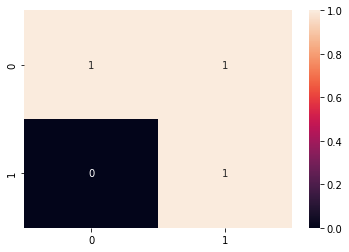

In [16]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [17]:
print("Accuracy: ", ac*100);

Accuracy:  66.66666666666666


## Cross Validation

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. 
That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

In [18]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [19]:
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)

# evaluate the model and collect the results
scores = cross_val_score(classifier_rf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores

array([0.5       , 0.66666667, 0.66666667, 0.75      , 0.66666667,
       0.33333333, 0.75      , 0.33333333, 0.66666667])

### Checking Mean and Accuracy post Cross Validation

In [20]:
print(np.mean(scores))

0.5925925925925926


In [21]:
print(np.std(scores))

0.15438270370863952
